<a href="https://colab.research.google.com/github/kellyslpang/unpackAIworkbooks/blob/main/Kelly_05_pet_breeds_own_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Image Classification - Own Code

Lesson 4 video from time 1:09:40 to the end and

Lesson 6 video from time 0:00:00 to 0:30:45   (skip lesson 4 video on ethics)

Own refactored code and notes for Chapter 5: *Pet Breeds with Assignments* (['05_pet_breads.ipynb'](https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/05_pet_breeds_w_assignments.ipynb#scrollTo=qyx684frVK78))

Refactor the code for the Image Classifier "Cats and Dogs" 

Rewrite the code for the image classifier that identifies Cats and Dogs; or, use your own data set that you have used before.
- Only use the code necessary to load the data, create tbe DataLoaders, presize and or augment the images and then train the model using all the knowledge and tools you have learned from the book so far adding the new nowledge you have gained in this chapter.
- Feel free to add any code that you perfer to use and make a note in the code as to why you perferred to use that code
- Add your own comments that can be used for reference in the future.

### Imports and setup

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 727kB 8.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 1.2MB 37.7MB/s 
     |████████████████████████████████| 194kB 16.2MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 61kB 4.1MB/s 
Mounted at /content/gdrive


### Preparing the data

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)
Path.BASE_PATH = path
path.ls()
(path/"images").ls()

(#7393) [Path('images/staffordshire_bull_terrier_39.jpg'),Path('images/Persian_262.jpg'),Path('images/chihuahua_76.jpg'),Path('images/Birman_4.jpg'),Path('images/keeshond_188.jpg'),Path('images/keeshond_50.jpg'),Path('images/saint_bernard_78.jpg'),Path('images/shiba_inu_32.jpg'),Path('images/Russian_Blue_62.jpg'),Path('images/boxer_14.jpg')...]

In [5]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images")

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


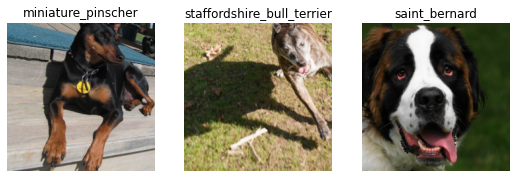

In [6]:
dls.show_batch(nrows=1, ncols=3)

### Training the Model

In [7]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.562713,0.373671,0.120433,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.540412,0.320679,0.098106,01:14
1,0.332223,0.236779,0.085250,01:14


In [9]:
learn.loss_func



FlattenedLoss of CrossEntropyLoss()

### Optimising and improving the model

In [14]:
x,y = dls.one_batch()
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [16]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([9.0636e-06, 2.8479e-05, 3.0283e-04, 2.8783e-05, 9.3228e-06, 4.3251e-06, 4.8995e-04, 4.2358e-04, 2.8923e-05, 1.2107e-05, 1.7485e-05, 7.8742e-07, 2.0887e-06, 2.7028e-06, 1.0531e-05, 1.2318e-05,
        1.5816e-06, 9.0632e-05, 5.2328e-05, 4.7465e-06, 2.7677e-05, 5.5184e-06, 1.9345e-04, 4.2024e-06, 1.8050e-03, 8.5825e-05, 1.1294e-04, 7.2552e-04, 9.7306e-03, 1.5618e-06, 9.8705e-06, 1.5040e-04,
        2.1689e-03, 1.2345e-04, 5.3284e-05, 5.2574e-04, 9.8274e-01])

In [17]:
len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

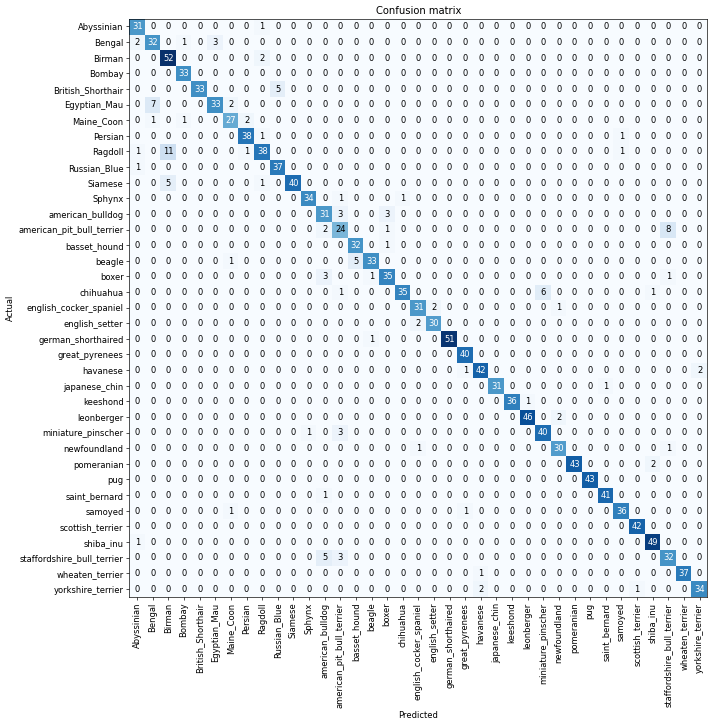

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [19]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 11),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 8),
 ('Egyptian_Mau', 'Bengal', 7),
 ('chihuahua', 'miniature_pinscher', 6),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Siamese', 'Birman', 5),
 ('beagle', 'basset_hound', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5)]

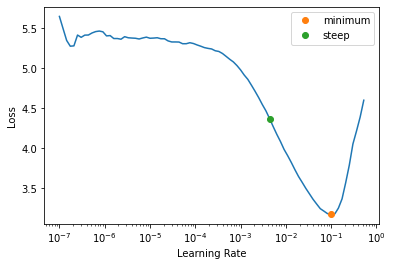

In [22]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [23]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 4.37e-03


In [24]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.129416,0.328631,0.111637,01:11
1,0.536547,0.304822,0.095399,01:11
2,0.314110,0.256305,0.087957,01:12


SuggestedLRs(minimum=1.0964781722577755e-07, steep=7.585775847473997e-07)

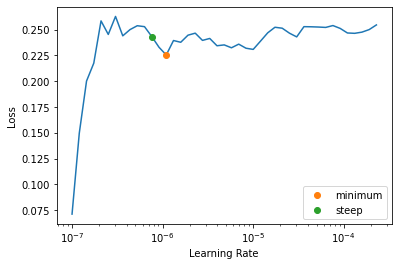

In [25]:
learn.unfreeze()
learn.lr_find(suggest_funcs=(minimum, steep))

In [26]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.264646,0.248918,0.081867,01:16
1,0.241171,0.242267,0.078484,01:17
2,0.229657,0.237024,0.077131,01:16
3,0.200491,0.235135,0.077131,01:17
4,0.183740,0.231788,0.077131,01:16
5,0.172619,0.232922,0.077131,01:17


In [27]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.128595,0.357115,0.108931,01:13
1,0.503286,0.311809,0.097429,01:13
2,0.323535,0.246806,0.077131,01:12


epoch,train_loss,valid_loss,error_rate,time
0,0.261383,0.243361,0.077131,01:16
1,0.253875,0.235717,0.074425,01:16
2,0.245105,0.233484,0.072395,01:17
3,0.206992,0.224268,0.066306,01:17
4,0.178193,0.230865,0.074425,01:17
5,0.162639,0.219831,0.071719,01:16
6,0.161088,0.220357,0.070365,01:16
7,0.138843,0.221404,0.072395,01:17
8,0.127195,0.221819,0.073748,01:17
9,0.122370,0.215921,0.070365,01:17


###Evaluate the results and test the model

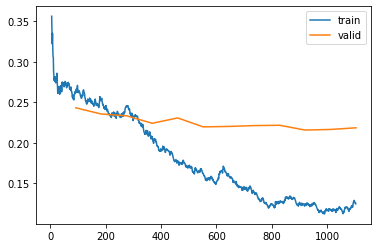

In [28]:
learn.recorder.plot_loss()

In [29]:
number_images = 1000

all_images = (path/'images').ls()
imgs_small = path / 'img-small'
if imgs_small.is_dir():
    shutil.rmtree(imgs_small)
os.makedirs(imgs_small, exist_ok=True)
for f in all_images[:number_images]:
    shutil.copy(src=f, dst=imgs_small / f.name)
imgs_small.ls()

(#1000) [Path('img-small/staffordshire_bull_terrier_39.jpg'),Path('img-small/Persian_262.jpg'),Path('img-small/chihuahua_76.jpg'),Path('img-small/Birman_4.jpg'),Path('img-small/keeshond_188.jpg'),Path('img-small/keeshond_50.jpg'),Path('img-small/saint_bernard_78.jpg'),Path('img-small/shiba_inu_32.jpg'),Path('img-small/Russian_Blue_62.jpg'),Path('img-small/boxer_14.jpg')...]

In [30]:
set_seed(88, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.918538,1.287811,0.420000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.297494,0.729996,0.230000,00:12
1,0.943466,0.612262,0.175000,00:12


**Assignment 1: Deep dive into Rate Finder:**

In [33]:
# Prepare DataBlock that will be used for each step below
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

seed_value = 1988

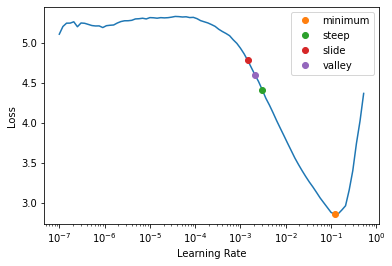

In [34]:
set_seed(seed_value, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_min, lr_steep, lr_slide, lr_valley = learn.lr_find(suggest_funcs=(minimum, steep, slide, valley))

In [35]:
print(f"lr_min: {lr_min}; lr_steep: {lr_steep}; lr_slide: {lr_slide}; lr_valley: {lr_valley}")
print("\n")
# format float numbers to make them easier to read
print(f"lr_min: {lr_min:.1e}; lr_steep: {lr_steep:.1e}; lr_slide: {lr_slide:.1e}; lr_valley: {lr_valley:.1e}")

lr_min: 0.012022644281387329; lr_steep: 0.0030199517495930195; lr_slide: 0.0014454397605732083; lr_valley: 0.0020892962347716093


lr_min: 1.2e-02; lr_steep: 3.0e-03; lr_slide: 1.4e-03; lr_valley: 2.1e-03


In [36]:
# lr = # add your value
lr = 0.0020892962347716093 #lr_valley
print(f"Using lr = {lr:.2e}")

set_seed(seed_value, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(epochs=4, base_lr=lr)

Using lr = 2.09e-03


epoch,train_loss,valid_loss,error_rate,time
0,4.191765,1.600637,0.455000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.780225,1.010906,0.325000,00:12
1,1.280801,0.644091,0.225000,00:11
2,0.967493,0.589009,0.195000,00:11
3,0.778589,0.564328,0.190000,00:12


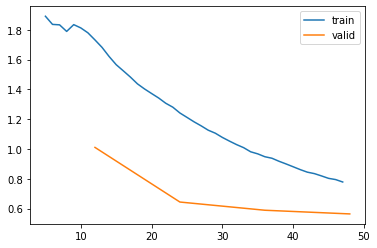

In [37]:
learn.recorder.plot_loss()

In [38]:
lr_too_small = 0.0001  # add your value
print(f"Using lr = {lr_too_small:.2e}")

set_seed(seed_value, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(epochs=4, base_lr=lr_too_small)

Using lr = 1.00e-04


epoch,train_loss,valid_loss,error_rate,time
0,5.148765,4.188066,0.950000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,5.061907,3.873319,0.915000,00:11
1,4.857145,3.582744,0.890000,00:11
2,4.713619,3.415800,0.860000,00:11
3,4.581094,3.383955,0.860000,00:11


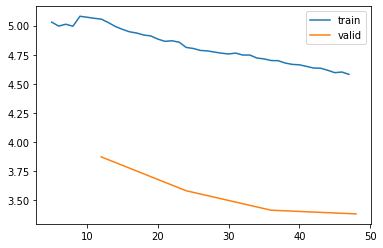

In [39]:
learn.recorder.plot_loss()

In [40]:
lr_too_big = 0.012022644281387329 #LR_min
print(f"Using lr = {lr_too_big:.2e}")

set_seed(seed_value, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)

learn.fine_tune(epochs=4, base_lr=lr_too_big)

Using lr = 1.20e-02


epoch,train_loss,valid_loss,error_rate,time
0,2.777314,0.986428,0.285000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.658627,0.936289,0.250000,00:11
1,0.641084,1.114175,0.270000,00:11
2,0.573845,1.074749,0.245000,00:11
3,0.457950,0.850818,0.215000,00:11


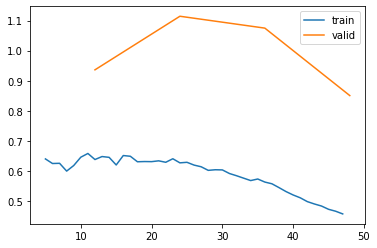

In [41]:
learn.recorder.plot_loss()

**Assignment 2: Using pretrained models**

In [42]:
# Prepare DataBlock that will be used for each steps below
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

seed_value = 1988

lr_min: 0.012022644281387329; lr_steep: 0.0030199517495930195; lr_slide: 0.0014454397605732083; lr_valley: 0.0020892962347716093




lr_min: 1.2e-02; lr_steep: 3.0e-03; lr_slide: 1.4e-03; lr_valley: 2.1e-03


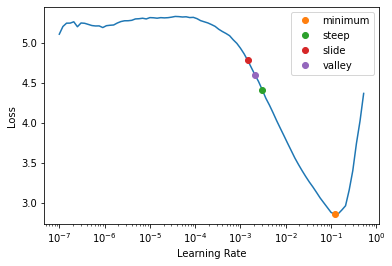

In [44]:
# Set model for reproducibility and find optimum lr
set_seed(seed_value, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)
print(f"lr_min: {lr_min}; lr_steep: {lr_steep}; lr_slide: {lr_slide}; lr_valley: {lr_valley}")
print("\n")
# format float numbers to make them easier to read
lr_min, lr_steep, lr_slide, lr_valley = learn.lr_find(suggest_funcs=(minimum, steep, slide, valley))
print(f"lr_min: {lr_min:.1e}; lr_steep: {lr_steep:.1e}; lr_slide: {lr_slide:.1e}; lr_valley: {lr_valley:.1e}")

In [45]:
# Pick your optimum learning rate:
lr = 0.0014454397605732083 # add your value
print(f"Using lr = {lr:.2e}")

Using lr = 1.45e-03


In [47]:
# Define arguments to use optimum lr and 6 epochs both for training of last layers and for full model (total of 12)

learn.fine_tune(epochs=6, base_lr=lr, freeze_epochs=6)

epoch,train_loss,valid_loss,error_rate,time
0,5.198045,3.961377,0.930000,00:11
1,4.630134,2.649383,0.680000,00:11
2,3.843377,1.452184,0.400000,00:11
3,3.000682,0.860706,0.285000,00:11
4,2.319216,0.648094,0.200000,00:11
5,1.832385,0.566449,0.200000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.488052,0.531522,0.180000,00:12
1,0.444962,0.503668,0.165000,00:12
2,0.381584,0.497368,0.140000,00:12
3,0.326976,0.465735,0.140000,00:11
4,0.291438,0.453369,0.140000,00:12
5,0.263624,0.452012,0.140000,00:12


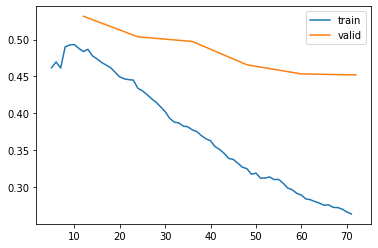

In [48]:
learn.recorder.plot_loss()

Using fit_one_cycle:

lr_min: 0.012022644281387329; lr_steep: 0.0030199517495930195; lr_slide: 0.0014454397605732083; lr_valley: 0.0020892962347716093




lr_min: 1.2e-02; lr_steep: 3.0e-03; lr_slide: 1.4e-03; lr_valley: 2.1e-03


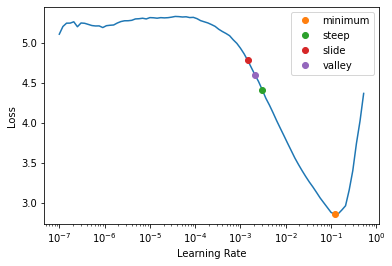

In [49]:
# Set model for reproducibility and find optimum lr
set_seed(seed_value, True)
dls = pets.dataloaders(path/"img-small")
learn = cnn_learner(dls, resnet18, metrics=error_rate)
lr_min, lr_steep, lr_slide, lr_valley = learn.lr_find(suggest_funcs=(minimum, steep, slide, valley))
print(f"lr_min: {lr_min}; lr_steep: {lr_steep}; lr_slide: {lr_slide}; lr_valley: {lr_valley}")
print("\n")
# format float numbers to make them easier to read
print(f"lr_min: {lr_min:.1e}; lr_steep: {lr_steep:.1e}; lr_slide: {lr_slide:.1e}; lr_valley: {lr_valley:.1e}")

In [50]:
# Pick your optimum learning rate. 
# In this case, because we have seeded the model, you should use the same lr as before for comparison.
# But you can experiment with different one's
# NOTE: if you use lr_slide or lr_valley as the reference value for your learning rate, you need to use lr_slide.item() or lr_valley.item()
# lr = (lr_min.item() + lr_steep.item()) /2

lr = 0.0014454397605732083 #lr_slide
print(f"Using lr = {lr:.2e}")

Using lr = 1.45e-03


In [51]:
# Define fit_one_cycle function and arguments to use optimum lr and 6 epochs
learn.fit_one_cycle(6, lr)


epoch,train_loss,valid_loss,error_rate,time
0,4.869468,2.708619,0.690000,00:12
1,3.279091,0.941463,0.320000,00:11
2,2.264370,0.623432,0.205000,00:11
3,1.662664,0.541743,0.165000,00:12
4,1.287139,0.520435,0.155000,00:11
5,1.047123,0.523380,0.165000,00:11


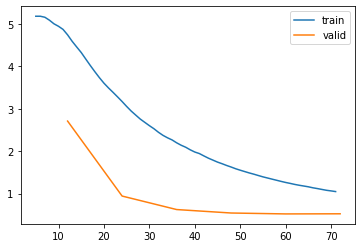

In [52]:
learn.recorder.plot_loss()

In [53]:
# Unfreeze the model
learn.unfreeze()

lr_min: 0.00014454397605732084; lr_steep: 1.0964781722577754e-06; lr_slide: 0.00013182566908653826; lr_valley: 0.00013182566908653826


lr_min: 1.4e-04; lr_steep: 1.1e-06; lr_slide: 1.3e-04; lr_valley: 1.3e-04


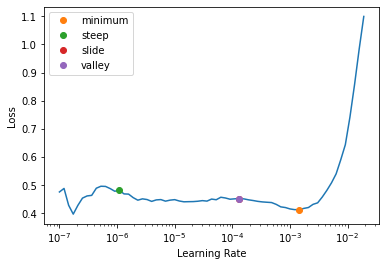

In [54]:
# Find new optimum lr
lr_min, lr_steep, lr_slide, lr_valley = learn.lr_find(suggest_funcs=(minimum, steep, slide, valley))
print(f"lr_min: {lr_min}; lr_steep: {lr_steep}; lr_slide: {lr_slide}; lr_valley: {lr_valley}")
print("\n")
# format float numbers to make them easier to read
print(f"lr_min: {lr_min:.1e}; lr_steep: {lr_steep:.1e}; lr_slide: {lr_slide:.1e}; lr_valley: {lr_valley:.1e}")

In [55]:
# Pick your optimum learning rate after unfreezing:

lr = 1e-04 # add your value

print(f"Using lr = {lr:.2e}")

Using lr = 1.00e-04


In [56]:
# Define fit_one_cycle function and arguments to use optimum lr and 6 epochs
learn.fit_one_cycle(6, lr)



epoch,train_loss,valid_loss,error_rate,time
0,0.388411,0.504319,0.150000,00:12
1,0.396115,0.538053,0.140000,00:12
2,0.355086,0.526951,0.155000,00:12
3,0.336243,0.513318,0.145000,00:12
4,0.297653,0.494281,0.135000,00:12
5,0.283181,0.490773,0.140000,00:12


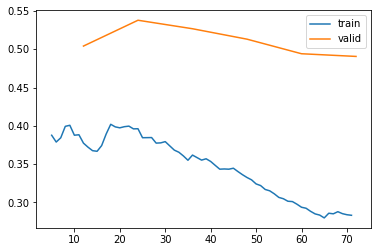

In [57]:
learn.recorder.plot_loss()

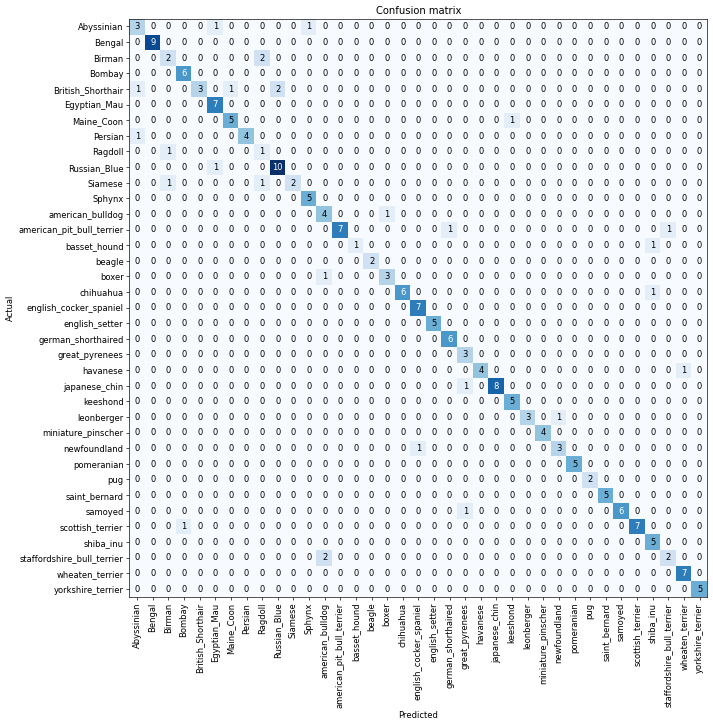

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)